<a href="https://colab.research.google.com/github/lennythecreator/AI-Model/blob/main/AI4ALL_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = "/content/drive/Shareddrives/AI4ALL/Cleaned Data Set - People.csv"
data2 = "/content/drive/Shareddrives/AI4ALL/Cleaned Data Set - House.csv"


data_set = pd.read_csv(data)
data_set2 = pd.read_csv(data2)

#merged_data = pd.merge(data_set,data_set2)
#merged_data
data_set


,Unnamed: 0,HHAGE,HHOLDKIDS,HHYNGKIDS,HHGRAD,HHMAR,HINCP,HHNATVTY,HHSEX,SAMESEXHH,RMHOOD,HHRACE,HHCITSHP
0,Age of householder,74,0,0,47',1',74030,057',1',2',-6',01',1'
1,Number of children,55,0,0,44',1',147000,057',1',2',-6',01',1'
2,Number of children under 6,-6,-6,-6,-6',-6',-6,-6',-6',-6',-6',-6',-6'
3,Education level of householder,80,0,0,39',3',1920,057',2',2',-6',01',1'
4,Marital Status,60,0,0,45',1',129000,057',1',2',-6',01',1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64136,NaN,-6,-6,-6,-6',-6',-6,-6',-6',-6',-6',-6',-6'
64137,NaN,44,0,0,39',1',125000,057',2',1',2',01',1'
64138,NaN,-6,-6,-6,-6',-6',-6,-6',-6',-6',-6',-6',-6'
64139,NaN,23,0,0,44',6',0,057',1',2',2',01',1'


In [16]:
data_set2 = pd.read_csv(data2)
data_set2.head(10)

,Unnamed: 0,VACANCY,FS,YRBUILT,REMODAMT,BLD,TENURE,DBMISSRENT,DBUTBILL
0,Vacancy Status,-6',2',1970,19900,02',1',-6',4'
1,Food Stamp,-6',2',1960,15100,02',1',-6',4'
2,Food Stamp,10',-6',1970,-6,02',-6',-6',-6'
3,Year built,-6',1',1970,-6,02',2',5',4'
4,Cost of home improvement jobs,-6',2',1980,3650,02',1',-6',4'
5,Type of building unit,-6',2',1980,750,02',1',-6',4'
6,renter status,07',-6',1950,-6,03',-6',-6',-6'
7,utility shutt off notice,06',-6',1980,-6,02',-6',-6',-6'
8,NaN,-6',-6',1990,300,02',1',-6',4'
9,NaN,-6',2',1990,-6,06',2',1',2'


In [38]:
data_set.columns

Index(['Unnamed: 0', 'HHAGE', 'HHOLDKIDS', 'HHYNGKIDS', 'HHGRAD', 'HHMAR',
       'HINCP', 'HHNATVTY', 'HHSEX', 'SAMESEXHH', 'RMHOOD', 'HHRACE',
       'HHCITSHP'],
      dtype='object')

In [39]:
data_set2.columns

Index(['Unnamed: 0', 'VACANCY', 'FS', 'YRBUILT', 'REMODAMT', 'BLD', 'TENURE',
       'DBMISSRENT', 'DBUTBILL'],
      dtype='object')

In [43]:
# Define your input features and target variable
X = data_set.drop(columns=['HHAGE'])  # Input features
y = data_set['HHAGE']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

ValueError: could not convert string to float: 'Education level of householder'

#Data about Tenure
## identifying what percent of the status of units owned or rented

In [17]:
data_set2['TENURE'].value_counts()

1'     31669
2'     23682
-6'     8083
3'       707
Name: TENURE, dtype: int64

In [18]:
owned_by_someone_in_household = (31669/len(data_set2['TENURE']))*100
rented = (23682/len(data_set2['TENURE']))*100
occupied_without_rent = (8083/len(data_set2['TENURE']))*100
n_a = (707/len(data_set2['TENURE']))*100
print(f"Status owned: {owned_by_someone_in_household}% , rented: {rented}%, Occupied without rent: {occupied_without_rent}%, n/a: {n_a}%")


Status owned: 49.37403532841708% , rented: 36.921781699692865%, Occupied without rent: 12.60192388643769%, n/a: 1.1022590854523628%


In [19]:
data_set2['DBMISSRENT'].value_counts()

-6'    40459
5'     21244
1'       685
3'       677
-9'      621
2'       406
4'        49
Name: DBMISSRENT, dtype: int64

<Axes: xlabel='DBMISSRENT', ylabel='Count'>

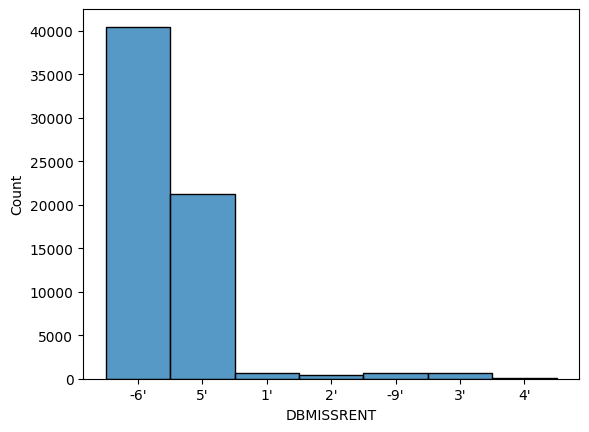

In [20]:
sns.histplot(data_set2['DBMISSRENT'])

#House Hold Gender

In [21]:
data_set['HHSEX'].value_counts()

2'     28667
1'     27391
-6'     8083
Name: HHSEX, dtype: int64

<Axes: xlabel='HHSEX', ylabel='Count'>

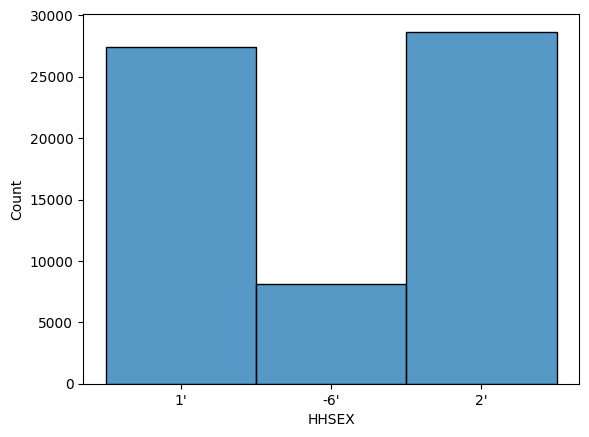

In [22]:
sns.histplot(data_set['HHSEX'])

#Age Feature

In [23]:
data_set['HHAGE'].value_counts()

-6     8083
 80    2140
 85    1983
 65    1151
 60    1148
       ... 
 19      86
 18      32
 17       5
 15       5
 16       4
Name: HHAGE, Length: 68, dtype: int64

In [24]:
mean_age = data_set['HHAGE'].mean()
mean_age

45.91588843329539

<Axes: xlabel='HHAGE', ylabel='TENURE'>

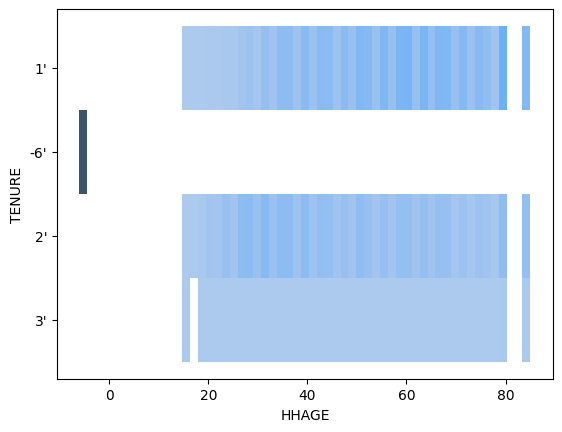

In [37]:
sns.histplot(data_set, x = data_set['HHAGE'], y = data_set2['TENURE'])

#KIDS

In [26]:
data_set['HHOLDKIDS']

0        0
1        0
2       -6
3        0
4        0
        ..
64136   -6
64137    0
64138   -6
64139    0
64140    0
Name: HHOLDKIDS, Length: 64141, dtype: int64

In [31]:
data_set['HHOLDKIDS'].value_counts()

 0     44377
-6      8083
 1      6079
 2      4002
 3      1191
 4       310
 5        76
 6        18
 8         2
 7         2
 15        1
Name: HHOLDKIDS, dtype: int64

#Info on race

In [27]:
data_set['HHRACE'].value_counts()

01'    40968
02'     9626
-6'     8083
04'     3691
03'      650
07'      303
06'      221
05'      213
08'      157
10'       83
15'       44
11'       21
14'       20
09'       18
20'       15
18'       11
16'        7
13'        4
12'        3
17'        2
19'        1
Name: HHRACE, dtype: int64

#Identifying people who moved in the last 2 years

In [28]:
data_set['RMHOOD'].value_counts()


-6'    51988
2'      7296
1'      4132
-9'      725
Name: RMHOOD, dtype: int64

<Axes: xlabel='RMHOOD', ylabel='Count'>

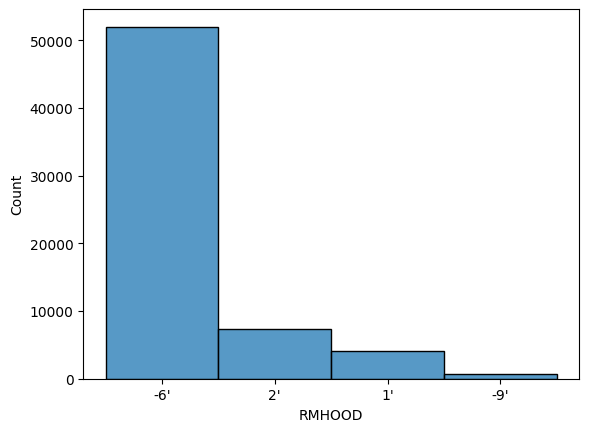

In [44]:
sns.histplot(data_set['RMHOOD'])

In [29]:
yeses =  4132
nos = 7296
total_resp = yeses + nos
percent_of_yes = (yeses/total_resp)*100
percent_of_nos = (nos/total_resp)*100
print(percent_of_yes, percent_of_nos)

36.15680784039202 63.84319215960797
